# Part A of Assignment 1
- Data cleaning
    - Are there missing values?
    - Are there inappropraite values?
    - Remove or impute any bad data.
- Answer the following questions for the data in each column:
    - How is the data distributed?
    - What are the summary statistics?
    - Are there anomalies/outliers?
- Are any of the columns correlated?

In [1]:
#Declaring imports for importing modules

import os
import pandas as pd
import glob
import json
import datetime as dt
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [2]:
#Current path is fetched
cur_path = os.path.dirname(os.getcwd())
print(cur_path)
file_path = cur_path + '/data/kaggle_gross_rent.csv'

/Users/palakagrawal/Desktop/Courses/ADS/assignments/assignment1


In [3]:
#Reading Schedule data into Dataframe
gross_rent_frame = pd.read_csv(file_path, encoding='latin-1')

/Users/palakagrawal/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
gross_rent_frame.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,Samples
0,101901,1,Alabama,AL,Chambers County,Wadley,Abanda,CDP,place,36276,256,7764034,34284,33.091627,-85.527029,972,968,51,12
1,101904,1,Alabama,AL,Winston County,Addison,Addison,Town,place,35540,256,9753292,83417,34.202681,-87.178004,519,460,275,64
2,101907,1,Alabama,AL,Marshall County,Albertville,Albertville city,City,place,35950,256,68731806,258708,34.263130,-86.210660,625,585,234,2560
3,101910,1,Alabama,AL,Pickens County,Aliceville,Aliceville city,City,place,35442,205,11819855,0,33.123686,-88.159364,546,438,354,574
4,101913,1,Alabama,AL,Etowah County,Walnut Grove,Altoona,Town,place,35990,205,11193369,25442,34.039204,-86.305697,350,303,185,114


# Part A - 1 - Data cleaning

In [5]:
# It will replace empty string values to None and Numeric to 0
for column in gross_rent_frame:
    if is_numeric_dtype(gross_rent_frame[column]):
        gross_rent_frame[column] = gross_rent_frame[[column]].fillna(value=0)
    elif is_string_dtype(gross_rent_frame[column]):
        gross_rent_frame[column] = gross_rent_frame[[column]].fillna(value='None')

In [6]:
gross_rent_frame.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,Samples
0,101901,1,Alabama,AL,Chambers County,Wadley,Abanda,CDP,place,36276,256,7764034,34284,33.091627,-85.527029,972,968,51,12
1,101904,1,Alabama,AL,Winston County,Addison,Addison,Town,place,35540,256,9753292,83417,34.202681,-87.178004,519,460,275,64
2,101907,1,Alabama,AL,Marshall County,Albertville,Albertville city,City,place,35950,256,68731806,258708,34.263130,-86.210660,625,585,234,2560
3,101910,1,Alabama,AL,Pickens County,Aliceville,Aliceville city,City,place,35442,205,11819855,0,33.123686,-88.159364,546,438,354,574
4,101913,1,Alabama,AL,Etowah County,Walnut Grove,Altoona,Town,place,35990,205,11193369,25442,34.039204,-86.305697,350,303,185,114


- ** There is no missing or inappropriate value in the dowloaded dataset **

# Part A - 2a - Data Distribution

In [7]:
# Seperate frame is created to calculate mean rent by states
mean_rent_by_state = gross_rent_frame[['State_Code','State_Name','ALand','Mean']]
mean_rent_by_state.head()

,State_Code,State_Name,ALand,Mean
0,1,Alabama,7764034,972
1,1,Alabama,9753292,519
2,1,Alabama,68731806,625
3,1,Alabama,11819855,546
4,1,Alabama,11193369,350


In [8]:
# calculate mean rent by states
avg_rent_by_state = mean_rent_by_state.groupby(['State_Code','State_Name'], as_index=False).mean()
avg_rent_by_state = avg_rent_by_state.sort_values(by='Mean',ascending=True)
avg_rent_by_state.head()

,State_Code,State_Name,ALand,Mean
51,72,Puerto Rico,9.372290e+06,487.712018
41,46,South Dakota,3.385918e+08,547.936937
34,38,North Dakota,2.478438e+08,585.336449
48,54,West Virginia,8.021831e+07,623.794203
15,19,Iowa,9.416539e+07,642.783286


In [9]:
# Calculating histogram for Mean rent for states
NumberOfStates, RangeOfRent = np.histogram(avg_rent_by_state['Mean'], bins = [400,600,800,1000,1200,1400,1600])
rent_hist_frame = pd.DataFrame(columns=['NumberOfStates','RangeOfRent'])
rent_hist_frame['NumberOfStates'] = pd.Series(NumberOfStates)
rent_hist_frame['RangeOfRent'] = pd.Series(RangeOfRent) 
rent_hist_frame

,NumberOfStates,RangeOfRent
0,3,400
1,19,600
2,14,800
3,10,1000
4,3,1200
5,3,1400


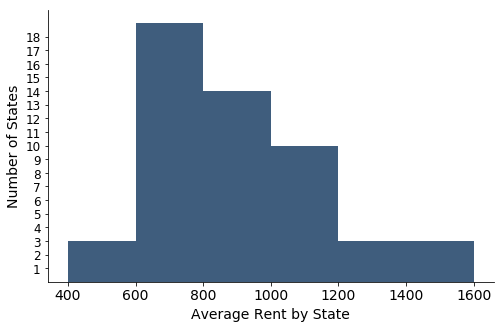

In [10]:
# Setting Size of the plot.    
plt.figure(figsize=(8, 5))  
  
# Removing the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensuring that the axis ticks only show up on the bottom and left of the plot.
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
  
# Making sure axis ticks are large enough to be easily read.
plt.xticks(fontsize=14)  
plt.yticks(range(1, 19, 1), fontsize=12)  
  
# Setting axis labels enough large to be easily read as well. 
plt.xlabel("Average Rent by State", fontsize=14)  
plt.ylabel("Number of States", fontsize=14)  
  
# Ploting the histogram
# "#3F5D7D" is the nice dark blue color.  
plt.hist(avg_rent_by_state['Mean'],color="#3F5D7D", bins = [400,600,800,1000,1200,1400,1600])
plt.savefig(cur_path+'/outcome/MeanRentByStateDistribution.jpg',bbox_inches="tight")
plt.show()

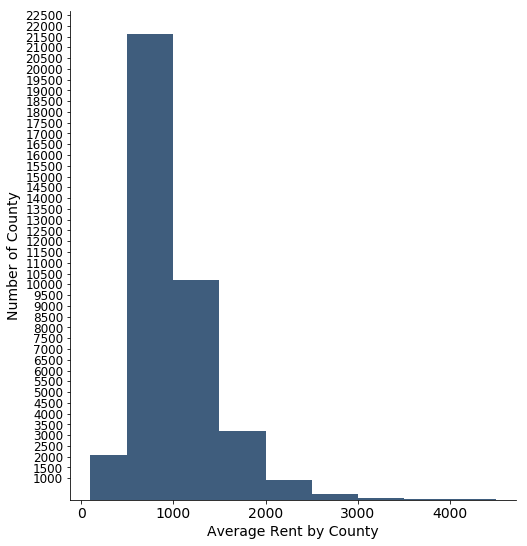

In [11]:
# Setting Size of the plot.    
plt.figure(figsize=(8, 9))  
  
# Removing the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensuring that the axis ticks only show up on the bottom and left of the plot.
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
  
# Making sure axis ticks are large enough to be easily read.
plt.xticks(fontsize=14)  
plt.yticks(range(1000, 45000, 500), fontsize=12)  
  
# Setting axis labels enough large to be easily read as well. 
plt.xlabel("Average Rent by County", fontsize=14)  
plt.ylabel("Number of County", fontsize=14)  
  
# Ploting the histogram
# "#3F5D7D" is the nice dark blue color.  
plt.hist(gross_rent_frame['Mean'],color="#3F5D7D", bins = [100,500,1000,1500,2000,2500,3000,3500,4000,4500])
plt.savefig(cur_path+'/outcome/MeanRentByCountyDistribution.jpg',bbox_inches="tight")
plt.show()

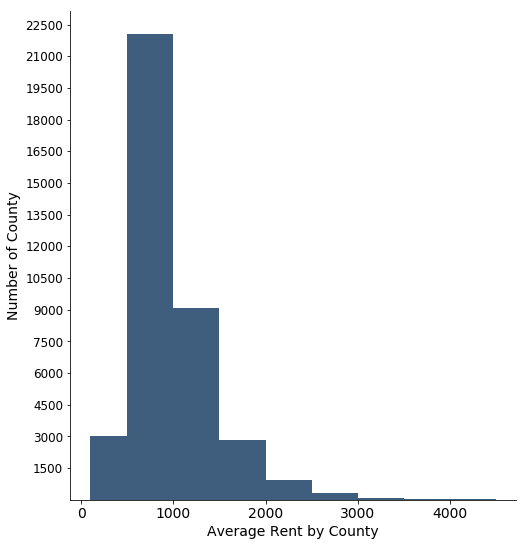

In [16]:
# Setting Size of the plot.    
plt.figure(figsize=(8, 9))  
  
# Removing the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensuring that the axis ticks only show up on the bottom and left of the plot.
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
  
# Making sure axis ticks are large enough to be easily read.
plt.xticks(fontsize=14)  
plt.yticks(range(1500, 45000, 1500), fontsize=12)  
  
# Setting axis labels enough large to be easily read as well. 
plt.xlabel("Average Rent by County", fontsize=14)  
plt.ylabel("Number of County", fontsize=14)  
  
# Ploting the histogram
# "#3F5D7D" is the nice dark blue color.  
plt.hist(gross_rent_frame['Median'],color="#3F5D7D", bins = [100,500,1000,1500,2000,2500,3000,3500,4000,4500])
plt.savefig(cur_path+'/outcome/MedianRentByCountyDistribution.jpg',bbox_inches="tight")
plt.show()

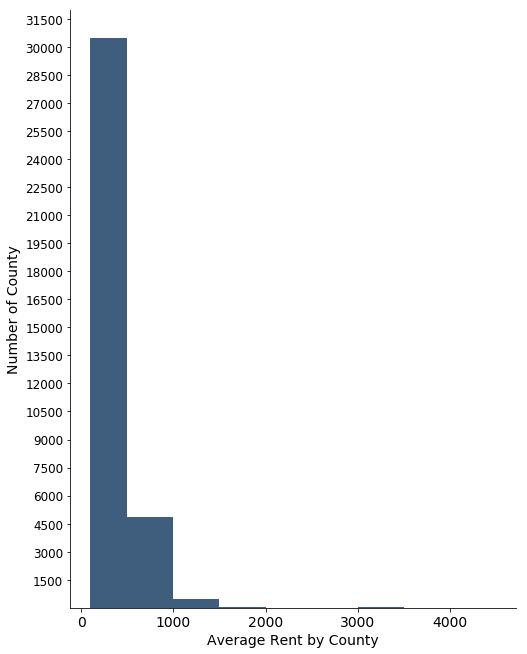

In [17]:
# Setting Size of the plot.    
plt.figure(figsize=(8, 11))  
  
# Removing the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensuring that the axis ticks only show up on the bottom and left of the plot.
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
  
# Making sure axis ticks are large enough to be easily read.
plt.xticks(fontsize=14)  
plt.yticks(range(1500, 45000, 1500), fontsize=12)  
  
# Setting axis labels enough large to be easily read as well. 
plt.xlabel("Average Rent by County", fontsize=14)  
plt.ylabel("Number of County", fontsize=14)  
  
# Ploting the histogram
# "#3F5D7D" is the nice dark blue color.  
plt.hist(gross_rent_frame['Stdev'],color="#3F5D7D", bins = [100,500,1000,1500,2000,2500,3000,3500,4000,4500])
plt.savefig(cur_path+'/outcome/StdDevRentByCountyDistribution.jpg',bbox_inches="tight")
plt.show()

In [18]:
gross_rent_frame['Mean'].skew()

1.2010756465412709

In [19]:
gross_rent_frame['Median'].skew()

1.4512236746360956

In [20]:
gross_rent_frame['Stdev'].skew()

2.8336197349900156

- ** From above graphs, it can be said that data is Skewed **
- ** From Skewness, It can be said that Data Distribution is positively Skewed**

# Part A - 2b - Summary Statistics

In [22]:
#Creating summary statistic frame
summary_statistic_frame = gross_rent_frame.describe(include = 'all')

In [23]:
summary_statistic_frame.reset_index()
summary_statistic_frame.index.names = ['Statistics']
summary_statistic_frame.reset_index()

,Statistics,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,Samples
0,count,4.042400e+04,40424.000000,40424,40424,40424,40424,40424,40424,40424,40424.000000,40424.0,4.042400e+04,4.042400e+04,40424.000000,40424.000000,40424.000000,40424.000000,40424.000000,40424.000000
1,unique,NaN,NaN,52,52,1683,9430,8910,13,2,NaN,355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,top,NaN,NaN,California,CA,Adams County,Chicago,Alameda city,Track,Track,NaN,718.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,freq,NaN,NaN,3402,3402,6741,298,2894,30116,30116,NaN,713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mean,5.344030e+07,28.328443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50047.200920,NaN,9.885934e+07,5.875433e+06,37.804154,-91.238662,945.879329,915.471329,311.845809,492.120547
5,std,1.018385e+08,16.510581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28607.579157,NaN,1.146564e+09,1.878089e+08,5.631173,15.896897,490.304785,504.722172,222.433989,5850.489814
6,min,1.021000e+03,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,601.000000,NaN,0.000000e+00,0.000000e+00,17.929085,-175.860041,0.000000,0.000000,0.000000,0.000000
7,25%,5.601258e+06,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28001.000000,NaN,1.985499e+06,0.000000e+00,33.997153,-97.387905,657.000000,624.000000,185.000000,52.000000
8,50%,2.602476e+07,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48117.500000,NaN,5.184370e+06,2.408150e+04,38.914010,-87.457253,857.000000,819.000000,277.000000,146.000000
9,75%,4.702199e+07,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75225.500000,NaN,2.610209e+07,4.337748e+05,41.515912,-80.144263,1166.000000,1132.000000,396.000000,358.000000


In [24]:
# Restricting decimals as per the column values
decimals = pd.Series([2,2,2,2,2,6,6,2,2,2,2], index=['id', 'State_Code', 'Zip_Code','ALand','AWater','Lat','Lon','Mean','Median','Stdev','Samples'])
summary_statistic_frame = summary_statistic_frame.round(decimals)

In [25]:
# Filling null strings with None and NaN numeric with 0s
for column in summary_statistic_frame:
    if is_numeric_dtype(summary_statistic_frame[column]):
        summary_statistic_frame[column] = summary_statistic_frame[[column]].fillna(value=0)
    elif is_string_dtype(summary_statistic_frame[column]):
        summary_statistic_frame[column] = summary_statistic_frame[[column]].fillna(value='None')

In [26]:
summary_statistic_frame.reset_index()

,Statistics,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,Samples
0,count,4.042400e+04,40424.00,40424,40424,40424,40424,40424,40424,40424,40424.00,40424.0,4.042400e+04,4.042400e+04,40424.000000,40424.000000,40424.00,40424.00,40424.00,40424.00
1,unique,0.000000e+00,0.00,52,52,1683,9430,8910,13,2,0.00,355.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00,0.00,0.00,0.00
2,top,0.000000e+00,0.00,California,CA,Adams County,Chicago,Alameda city,Track,Track,0.00,718.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00,0.00,0.00,0.00
3,freq,0.000000e+00,0.00,3402,3402,6741,298,2894,30116,30116,0.00,713.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00,0.00,0.00,0.00
4,mean,5.344030e+07,28.33,None,None,None,None,None,None,None,50047.20,0.0,9.885934e+07,5.875433e+06,37.804154,-91.238662,945.88,915.47,311.85,492.12
5,std,1.018385e+08,16.51,None,None,None,None,None,None,None,28607.58,0.0,1.146564e+09,1.878089e+08,5.631173,15.896897,490.30,504.72,222.43,5850.49
6,min,1.021000e+03,1.00,None,None,None,None,None,None,None,601.00,0.0,0.000000e+00,0.000000e+00,17.929085,-175.860041,0.00,0.00,0.00,0.00
7,25%,5.601258e+06,13.00,None,None,None,None,None,None,None,28001.00,0.0,1.985499e+06,0.000000e+00,33.997153,-97.387905,657.00,624.00,185.00,52.00
8,50%,2.602476e+07,28.00,None,None,None,None,None,None,None,48117.50,0.0,5.184370e+06,2.408150e+04,38.914010,-87.457253,857.00,819.00,277.00,146.00
9,75%,4.702199e+07,42.00,None,None,None,None,None,None,None,75225.50,0.0,2.610209e+07,4.337748e+05,41.515912,-80.144263,1166.00,1132.00,396.00,358.00


# Part A - 2c - Outlier detection

In [27]:
#keep only the ones that are within +3 to -3 standard deviations in the column 'Mean'.
gross_rent_wo_outlier_frame = gross_rent_frame[np.abs(gross_rent_frame.Mean-gross_rent_frame.Mean.mean())<=(3*gross_rent_frame.Mean.std())]

In [28]:
gross_rent_wo_outlier_frame.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,Samples
0,101901,1,Alabama,AL,Chambers County,Wadley,Abanda,CDP,place,36276,256,7764034,34284,33.091627,-85.527029,972,968,51,12
1,101904,1,Alabama,AL,Winston County,Addison,Addison,Town,place,35540,256,9753292,83417,34.202681,-87.178004,519,460,275,64
2,101907,1,Alabama,AL,Marshall County,Albertville,Albertville city,City,place,35950,256,68731806,258708,34.263130,-86.210660,625,585,234,2560
3,101910,1,Alabama,AL,Pickens County,Aliceville,Aliceville city,City,place,35442,205,11819855,0,33.123686,-88.159364,546,438,354,574
4,101913,1,Alabama,AL,Etowah County,Walnut Grove,Altoona,Town,place,35990,205,11193369,25442,34.039204,-86.305697,350,303,185,114


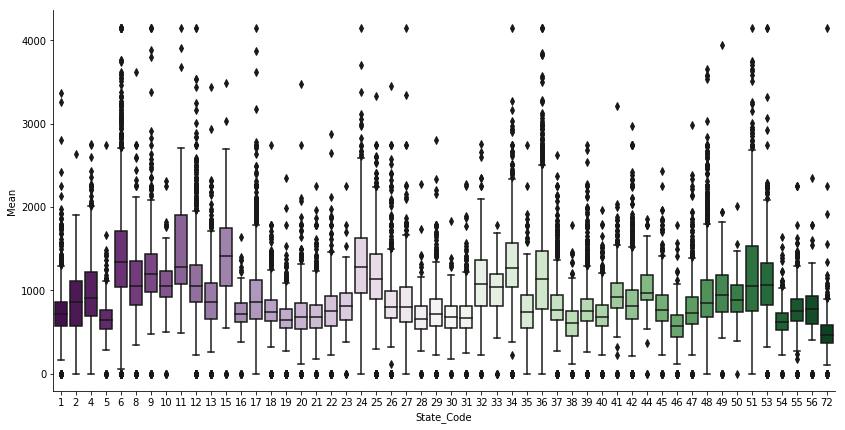

In [29]:
# Setting Size of the plot.    
plt.figure(figsize=(14, 7))  
  
# Removing the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensuring that the axis ticks only show up on the bottom and left of the plot.
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

sns.boxplot(x="State_Code", y="Mean", data=gross_rent_frame, palette="PRGn")
plt.savefig(cur_path+'/outcome/MeanRentBoxPLotWithOutliers.jpg',bbox_inches="tight")
plt.show()

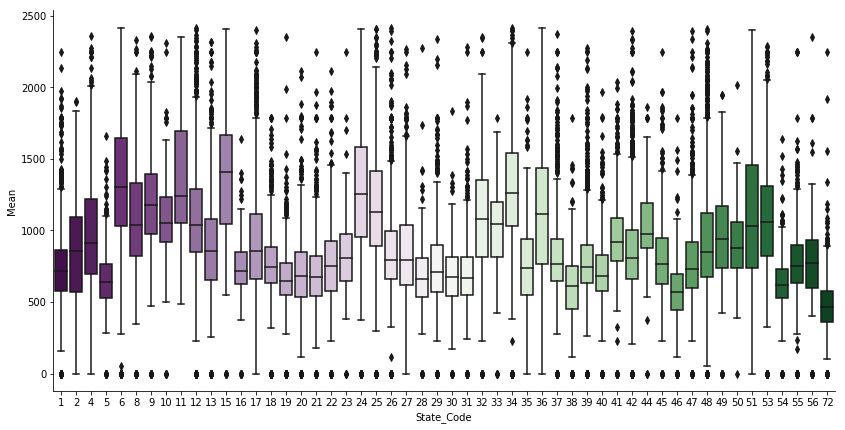

In [30]:
# Setting Size of the plot.    
plt.figure(figsize=(14, 7))  
  
# Removing the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensuring that the axis ticks only show up on the bottom and left of the plot.
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

sns.boxplot(x="State_Code", y="Mean", data=gross_rent_wo_outlier_frame, palette="PRGn")
plt.savefig(cur_path+'/outcome/MeanRentBoxPLotWithoutOutliers.jpg',bbox_inches="tight")
plt.show()

- ** Outliers are removed and shown in above graphs **

# Part A - 3 - Column Correlation

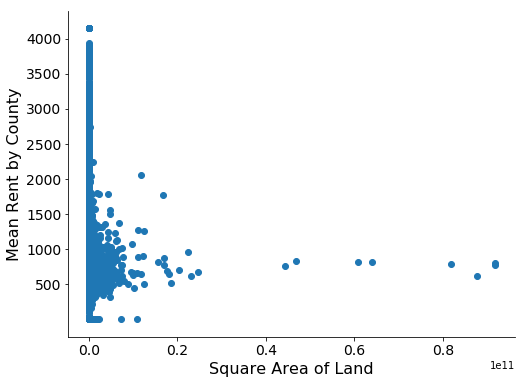

In [31]:
# Setting Size of the plot.    
plt.figure(figsize=(8, 6))  
  
# Removing the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensuring that the axis ticks only show up on the bottom and left of the plot.
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Making sure axis ticks are large enough to be easily read.
plt.xticks(fontsize=14)  
plt.yticks(range(500, 4100, 500),fontsize=14)  
  
# Setting axis labels enough large to be easily read as well. 
plt.xlabel("Square Area of Land", fontsize=16)  
plt.ylabel("Mean Rent by County", fontsize=16)  

plt.scatter(gross_rent_frame['ALand'],gross_rent_frame['Mean'])
plt.savefig(cur_path+'/outcome/ScatterPlotForRentVSLand.jpg',bbox_inches="tight")
plt.show()

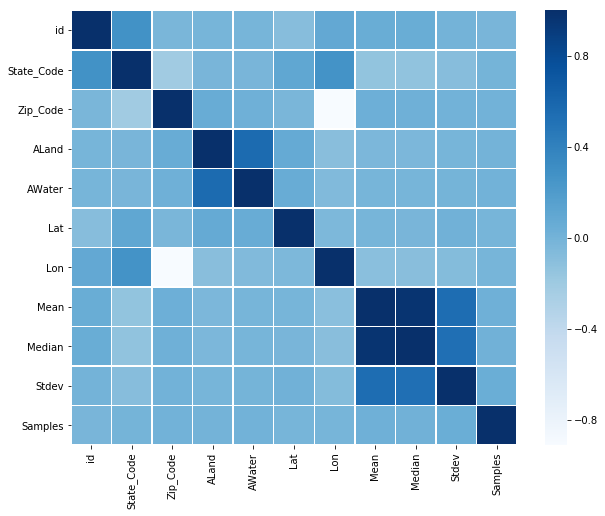

In [32]:
#Showing correlation between all the columns of the dataet

fig, ax = plt.subplots(figsize=(10,8)) 
corr = gross_rent_frame.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, fmt="g", cmap='Blues',linewidths=.5,ax=ax)
plt.savefig(cur_path+'/outcome/HeatMapForCorrelationMatrices.jpg',bbox_inches="tight")
plt.show()